In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))\

import pandas as pd
import numpy as np
import GPy
import seaborn as sns
    
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
np.linspace(0,10)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [4]:
max_p=2
min_p=0
period = np.array([max_p]*5+[min_p]*2)
reps=6
Y=np.tile(period,reps)
data_len=len(Y)
lin=np.linspace(0,2*len(Y)-1,data_len)
Y=Y+lin
noise = np.random.normal(0,1,data_len)
Y=Y+noise
Y_noperiod=(lin+noise).reshape(-1,1)
Y=Y.reshape(-1,1)
X = np.linspace(0, data_len-1, data_len).reshape(-1, 1)
#Y

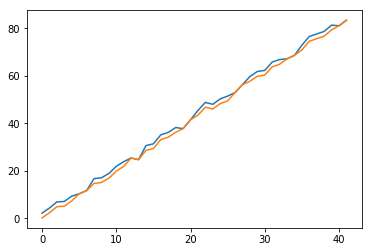

In [5]:
plt.plot(X,Y)
plt.plot(X,Y_noperiod)

### Why does adding the bias here make it predict so much better when having no noise?

GP_regression.,value,constraints,priors
sum.periodic_Matern52.variance,3.417618383117121,+ve,
sum.periodic_Matern52.lengthscale,1.3356638904766422,+ve,
sum.periodic_Matern52.period,7.013870846139724,+ve,
sum.linear.variances,4.349192181864633,+ve,
Gaussian_noise.variance,0.9799371863652706,+ve,


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


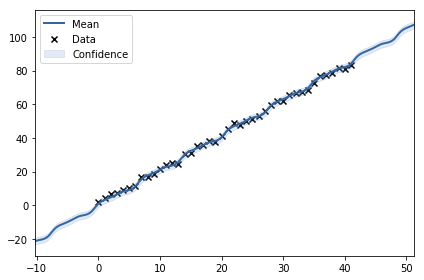

In [6]:
PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
BIAS = GPy.kern.Bias(input_dim=1, variance=2)
LIN=GPy.kern.Linear(1)

m = GPy.models.GPRegression(X, Y, MATERN+LIN)
m.optimize()
display(m)

m.plot()

GP_regression.,value,constraints,priors
sum.periodic_Matern52.variance,7.403316173935008,+ve,
sum.periodic_Matern52.lengthscale,6.137677321674636,+ve,
sum.periodic_Matern52.period,7.344982006158887,+ve,
sum.linear.variances,4.137852373960055,+ve,
Gaussian_noise.variance,0.6499559332283241,+ve,


 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


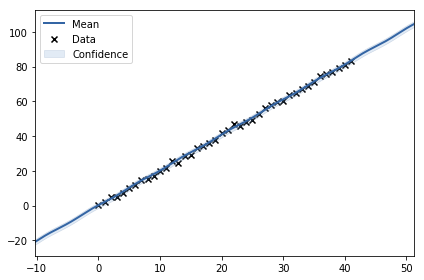

In [7]:
PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
BIAS = GPy.kern.Bias(input_dim=1, variance=2)
LIN=GPy.kern.Linear(1)

m = GPy.models.GPRegression(X, Y_noperiod, MATERN+LIN)
m.optimize()
display(m)

m.plot()

In [8]:
# larger log likelihood better?

In [9]:
reps=6
data_len=reps*7
X = np.linspace(0, data_len-1, data_len).reshape(-1, 1)

In [10]:
max_p=2
min_p=0
period = np.array([max_p]*5+[min_p]*2)
p_arr=np.tile(period,reps)

 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/GPy/kern/src/periodic.py:306: RuntimeWarning:divide by zero encountered in true_divide
 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/GPy/kern/src/periodic.py:306: RuntimeWarning:overflow encountered in true_divide
 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/GPy/kern/src/periodic.py:328: RuntimeWarning:overflow encountered in multiply
 /m/home/home4/47/valentt1/unix/Envs/GaussianProcesses/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning:This f

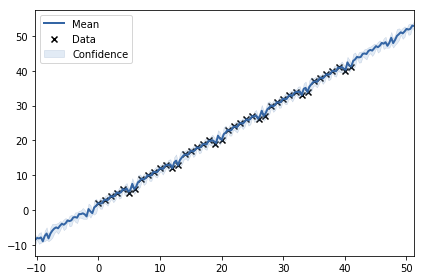

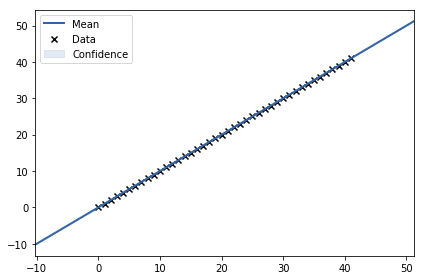

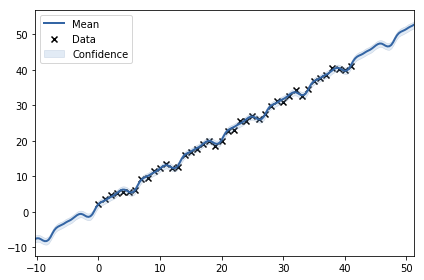

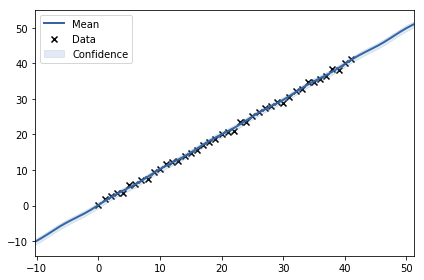

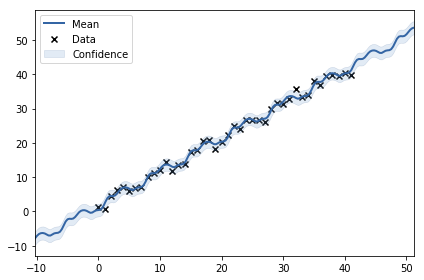

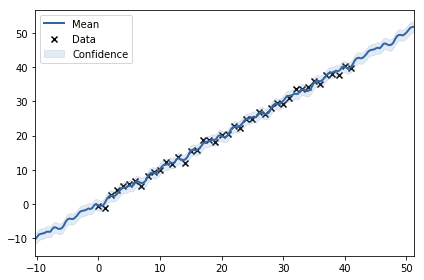

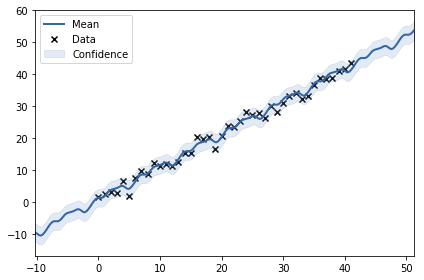

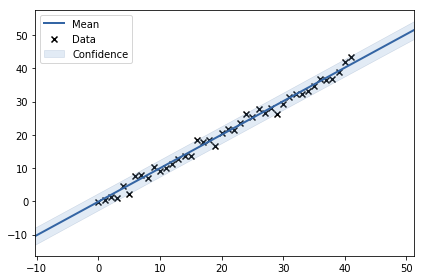

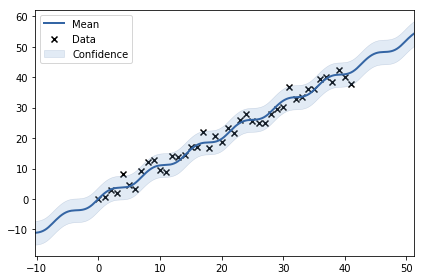

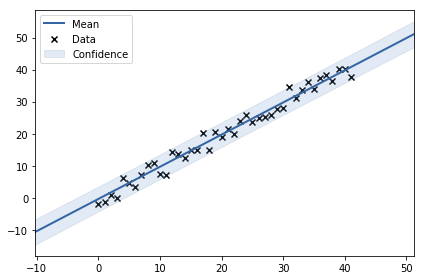

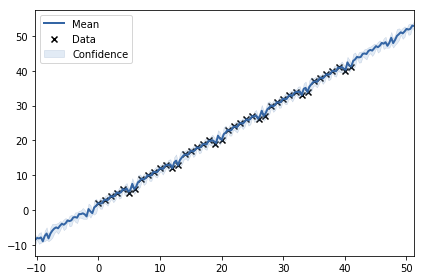

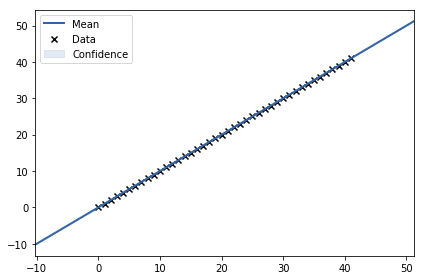

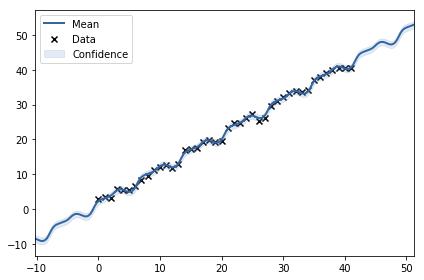

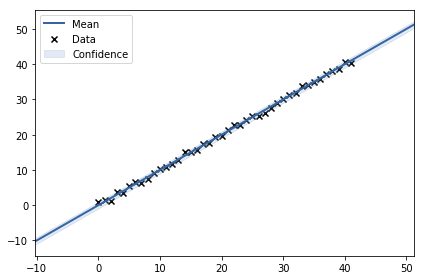

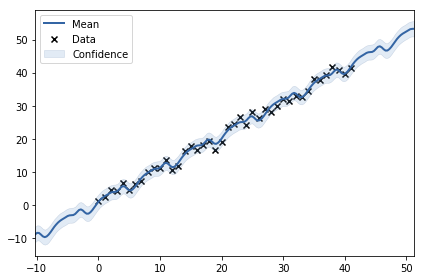

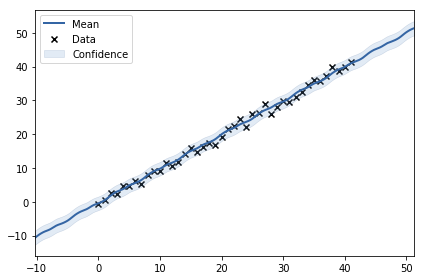

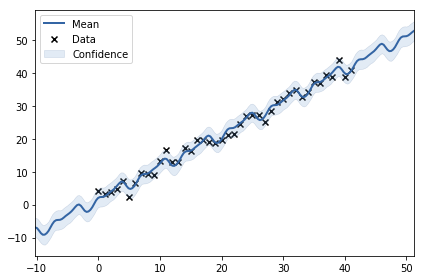

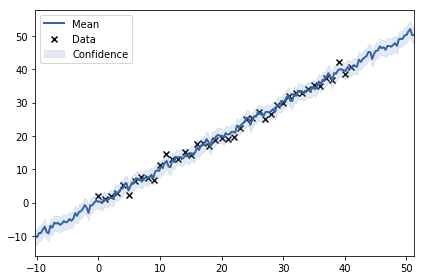

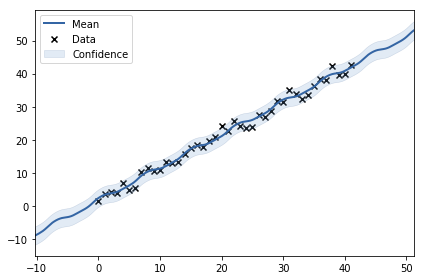

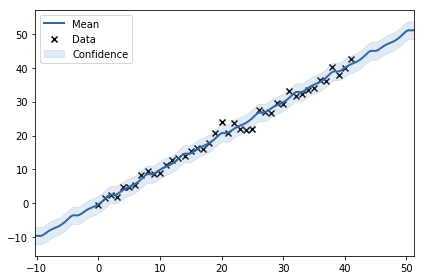

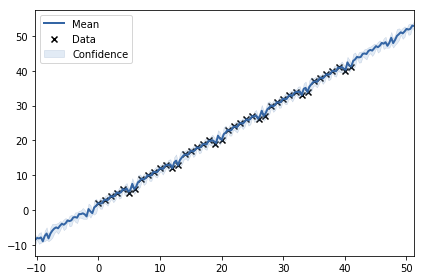

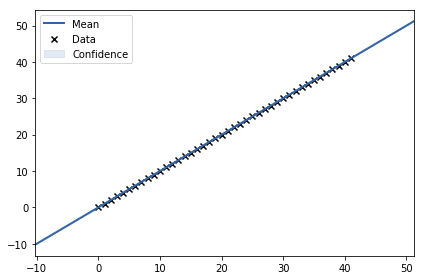

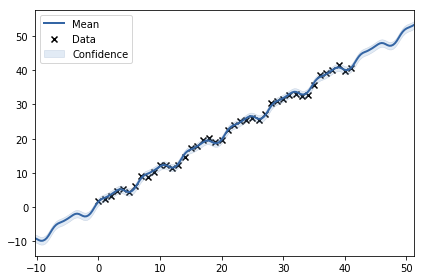

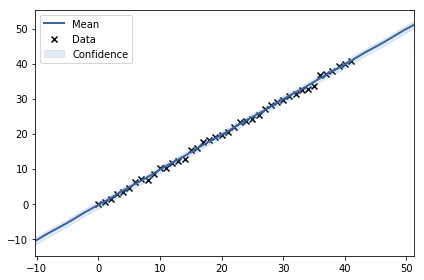

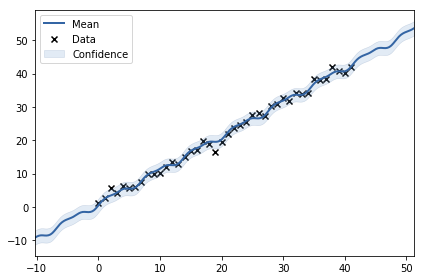

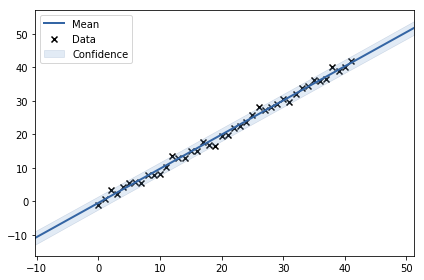

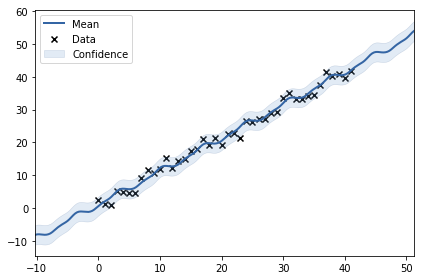

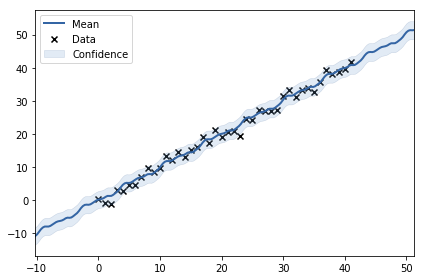

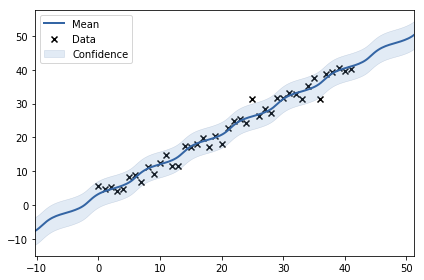

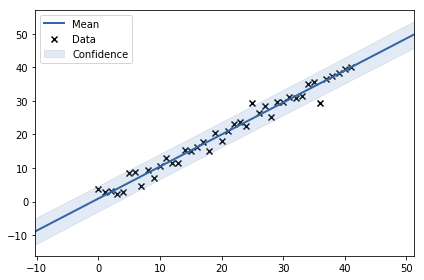

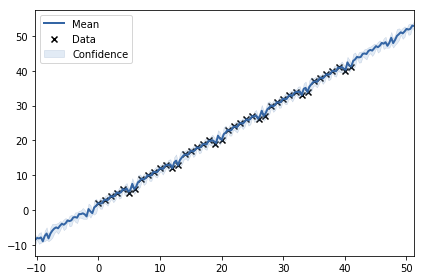

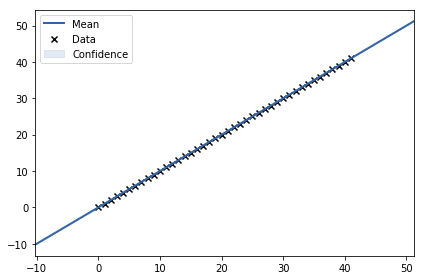

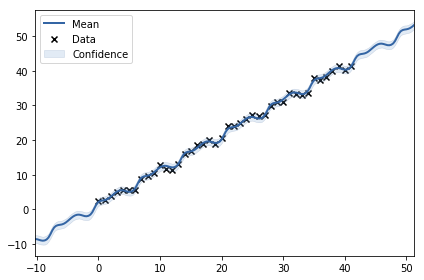

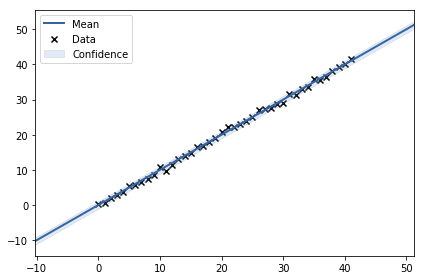

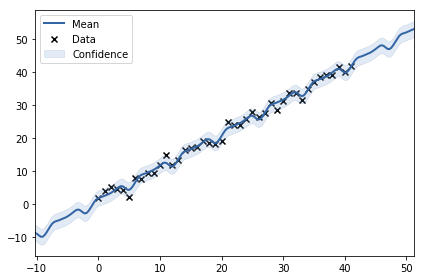

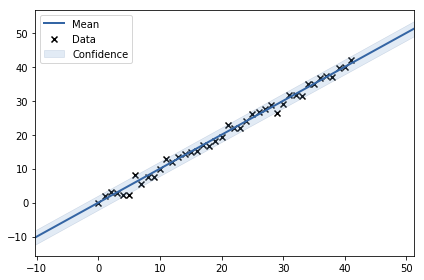

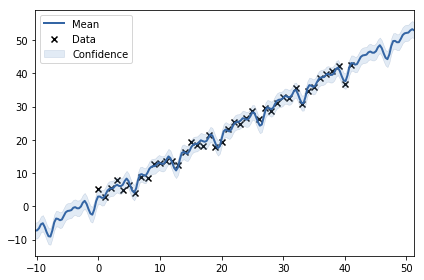

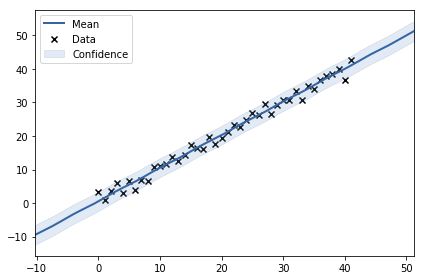

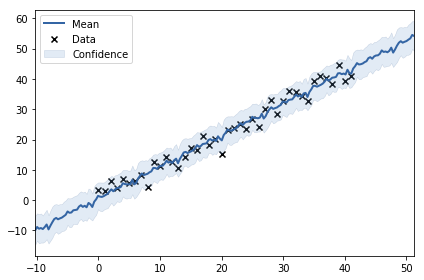

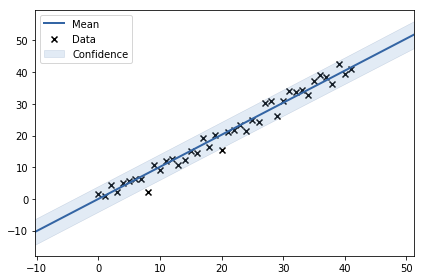

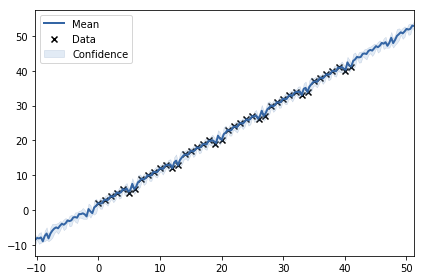

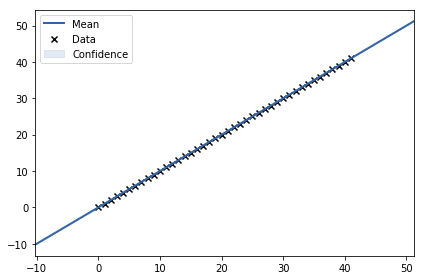

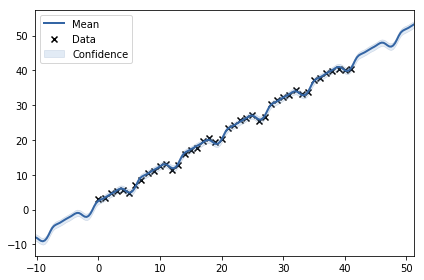

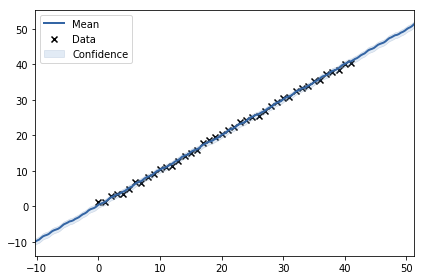

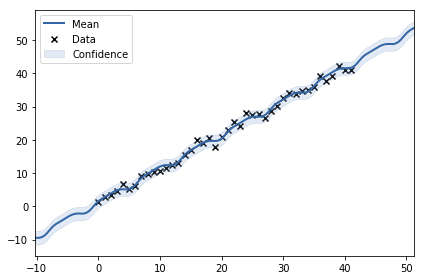

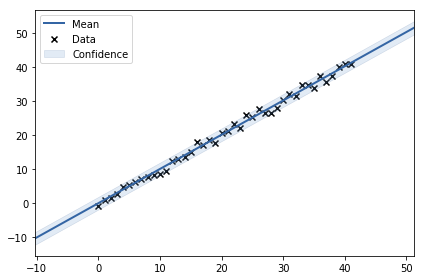

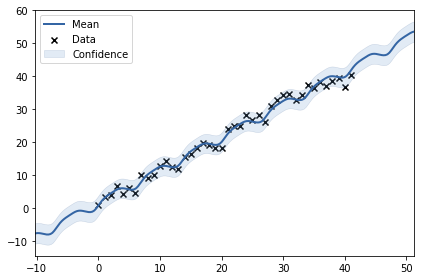

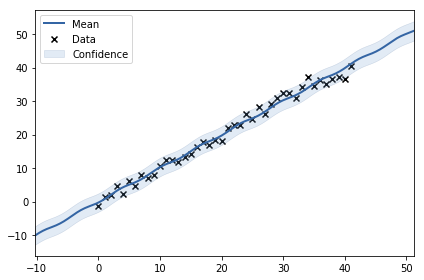

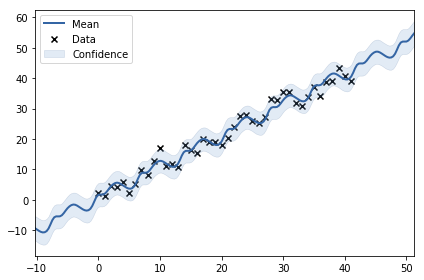

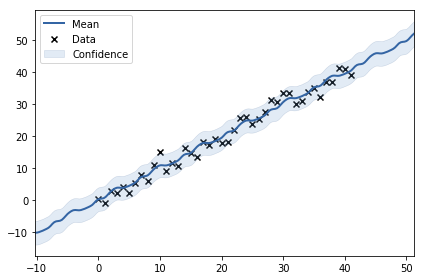

In [16]:
df=pd.DataFrame(columns=['pv','pl','pp','lv','bv','gn','ll','Contains period'],index=range(50))
i=0
rows_list=[]
for k in range(5):
    for lin_a in range(1,2):
        for noise_v in np.linspace(0,2,5):
            PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
            MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
            BIAS = GPy.kern.Bias(input_dim=1, variance=2)
            LIN=GPy.kern.Linear(1)
            #print(noise_v)
            lin=np.linspace(0,lin_a*len(Y)-1,data_len)
            noise = np.random.normal(0,noise_v,data_len)
            Yp=p_arr+lin+noise
            Ylin=lin+noise
            Yp=Yp.reshape(-1,1)
            Ylin=Ylin.reshape(-1,1)
            mp = GPy.models.GPRegression(X, Yp, MATERN+LIN+BIAS)
            mp.optimize()
            mp.plot()
            df.loc[i][:'gn']=mp.param_array
            df.loc[i]['ll']=mp.log_likelihood()
            df.loc[i]['Contains period']=True
            i+=1

            PERIODIC = GPy.kern.PeriodicExponential(input_dim=1, variance=1, lengthscale=3, period=7)
            MATERN = GPy.kern.PeriodicMatern52(input_dim=1, variance=1, lengthscale=3, period=7)
            BIAS = GPy.kern.Bias(input_dim=1, variance=2)
            LIN=GPy.kern.Linear(1)

            ml = GPy.models.GPRegression(X, Ylin, MATERN+LIN+BIAS)
            ml.optimize()
            ml.plot()
            df.loc[i][:'gn']=ml.param_array
            df.loc[i]['ll']=ml.log_likelihood()
            df.loc[i]['Contains period']=False
            i+=1
        
        

In [17]:
df=df.dropna()
df

,pv,pl,pp,lv,bv,gn,ll,Contains period
0,5.36625,0.0277202,7,0.995294,2.08888,2.02202e-10,258.36,True
1,1.69477e-16,66.8006,6.05435,0.999995,6.76696e-25,5.56268e-309,333.49,False
2,2.57621,1.25541,6.95021,0.973757,2.91429,0.176302,-40.6436,True
3,11.3638,9.73685,7.9271,0.982828,0.0353316,0.157787,-28.648,False
4,3.24147,1.00225,6.7208,0.98261,2.99143,0.720434,-66.727,True
5,0.899626,0.450497,6.69685,1.00486,2.8667e-07,0.540274,-58.9979,False
6,2.46442,0.854113,7.12107,1.0468,0.939614,1.59126,-79.9946,True
7,0.0667291,6.87952,3.91305,1.01634,0.0433839,1.66278,-75.1897,False
8,910503,41.892,7.13585,1.08435,5.56268e-309,3.77086,-93.5605,True
9,0.0299002,7.28446,5.09032,1.01073,0.314562,3.75906,-92.1092,False


In [18]:
df['pv']=df['pv'].apply(pd.to_numeric)
df['pl']=df['pl'].apply(pd.to_numeric)

Text(0.5,1,'Periodic kernel variables after optimization')

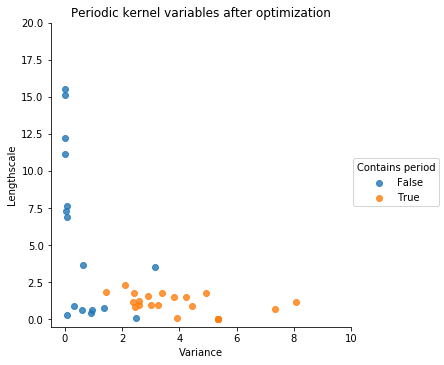

In [19]:
#plotting in log-scale with seaborn was horrible, so this was easiest way to do it
#df['pv_log']=np.log(df['pv'])
grid=sns.lmplot(x='pv',y='pl',data=df,fit_reg=False,hue='Contains period')
axes = grid.axes
axes[0,0].set_xlim(-0.5,10)
axes[0,0].set_ylim(-0.5,20)
grid.set_ylabels("Lengthscale")
grid.set_xlabels("Variance")
plt.title("Periodic kernel variables after optimization")
